## Team Data_Deciphers

### Time Series Forecasting (with smaller dataset)

In [25]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

import statsmodels.graphics.tsaplots as tsa
import statsmodels.tsa.stattools as ts

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# read data
data_sales=pd.read_csv('TrainingData - Training.csv', index_col=0) 

In [27]:
# doing some sanity check of data
data_sales.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
Period,,,,,,,,,,,,,,,,,,,,,
2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,...,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,...,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,...,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,...,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,...,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


[]

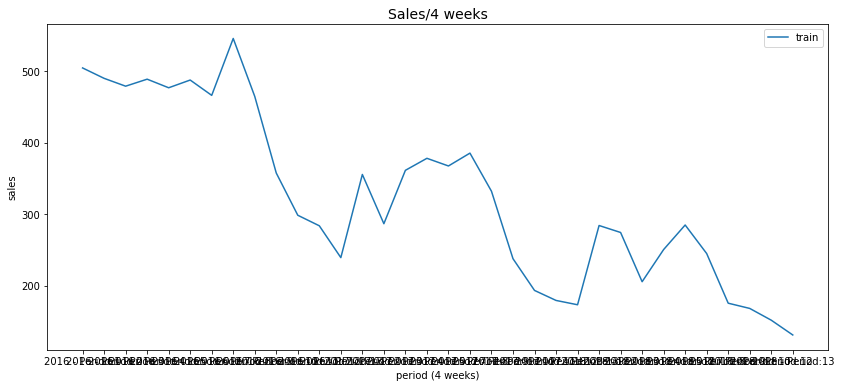

In [28]:
# lets plot the time series data and check for stationarity of the series

plt.figure(figsize=(14,6))
plt.plot(data_sales['EQ'], label='train')
plt.xlabel('period (4 weeks)')
plt.ylabel('sales')
plt.title('Sales/4 weeks', fontsize=14)
plt.legend(loc='best')
plt.plot()

There is trend in data and it looks like a pure white noice. 

Let's plot ACF and PACF grapgs to check auto correation lagged values

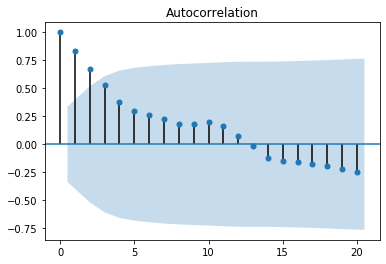

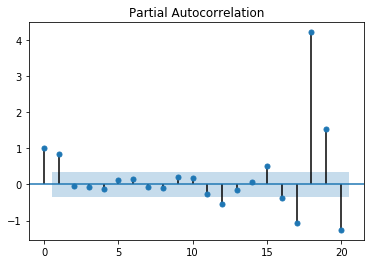

In [29]:
#ACF and PACF
tsa.plot_acf(data_sales['EQ'],lags=20)
tsa.plot_pacf(data_sales['EQ'],lags=20)
plt.show()

In [30]:
# define p d and q parameters to take any values betweem 0 and 2
p=d=q= range(0,2)

# generate all the different combinations of P, D, and Q

pdq=list(itertools.product(p,d,q))

# generate all the different combinations of seasonality p,d and q triplets

seasonal_pdq=[(x[0],x[1],x[2], 13) for x in list(itertools.product(p,d,q))]

print("Example of param components for seasonal ARIMA")
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3],seasonal_pdq[3]))

Example of param components for seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 13)
SARIMAX: (0, 1, 0) x (0, 1, 0, 13)
SARIMAX: (0, 1, 1) x (0, 1, 1, 13)


In [31]:
train=np.log(data_sales['EQ'])

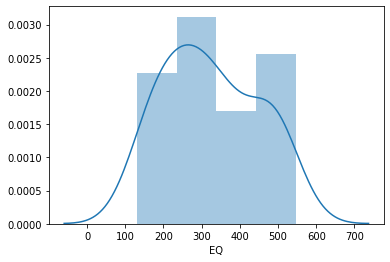

In [32]:
sns.distplot(data_sales['EQ'])
plt.show()

In [33]:
for param_seasonal in seasonal_pdq:
    print(param_seasonal)

(0, 0, 0, 13)
(0, 0, 1, 13)
(0, 1, 0, 13)
(0, 1, 1, 13)
(1, 0, 0, 13)
(1, 0, 1, 13)
(1, 1, 0, 13)
(1, 1, 1, 13)


In [34]:
# iteration of all the combinations of p, d and q

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(train,
                                         order=param,
                                         seasonal_order=param_seasonal,
                                         enforce_stationarity= False,
                                         enforce_invertibility=False)
            results= mod.fit()
            
            print("ARIMA{} x {}12 - AIC:{} - BIC:{}".format(param,param_seasonal,round(results.aic,4),round(results.bic,4)))
        except :
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 13)12 - AIC:210.5597 - BIC:212.0563
ARIMA(0, 0, 0) x (0, 1, 0, 13)12 - AIC:33.6405 - BIC:34.6362
ARIMA(0, 0, 0) x (1, 0, 0, 13)12 - AIC:9.4024 - BIC:11.4914
ARIMA(0, 0, 0) x (1, 1, 0, 13)12 - AIC:10.552 - BIC:10.7108
ARIMA(0, 0, 1) x (0, 0, 0, 13)12 - AIC:166.2322 - BIC:169.1637
ARIMA(0, 0, 1) x (0, 1, 0, 13)12 - AIC:19.1112 - BIC:21.0001
ARIMA(0, 0, 1) x (1, 0, 0, 13)12 - AIC:11.5704 - BIC:14.704
ARIMA(0, 0, 1) x (1, 1, 0, 13)12 - AIC:10.4843 - BIC:10.7227
ARIMA(0, 1, 0) x (0, 0, 0, 13)12 - AIC:-12.5759 - BIC:-11.1101
ARIMA(0, 1, 0) x (0, 1, 0, 13)12 - AIC:7.9692 - BIC:8.9137
ARIMA(0, 1, 0) x (1, 0, 0, 13)12 - AIC:-2.7457 - BIC:-0.7542
ARIMA(0, 1, 0) x (1, 1, 0, 13)12 - AIC:0.2077 - BIC:0.0995
ARIMA(0, 1, 1) x (0, 0, 0, 13)12 - AIC:-9.1559 - BIC:-6.2879
ARIMA(0, 1, 1) x (0, 1, 0, 13)12 - AIC:9.801 - BIC:11.5817
ARIMA(0, 1, 1) x (1, 0, 0, 13)12 - AIC:-1.6973 - BIC:1.2899
ARIMA(0, 1, 1) x (1, 1, 0, 13)12 - AIC:-1.1392 - BIC:-1.3014
ARIMA(1, 0, 0) x (0, 0, 0, 1

In [35]:
arima_model_train = sm.tsa.statespace.SARIMAX(train,
                                             order=(2,1,2),
                                             seasonal_order= (1, 0, 0, 13),
                                              enforce_stationarity= False,
                                         enforce_invertibility=False)
results_arima_train= arima_model_train.fit()

print(results_arima_train.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0238      0.817     -0.029      0.977      -1.625       1.577
ar.L2         -0.0005      0.080     -0.006      0.995      -0.157       0.156
ma.L1         -1.2813     12.053     -0.106      0.915     -24.906      22.343
ma.L2         -2.3080     22.636     -0.102      0.919     -46.674      42.058
ar.S.L13       0.0600      0.550      0.109      0.913      -1.017       1.137
sigma2         0.0051      0.052      0.097      0.922      -0.098       0.108


In [36]:
# predict value based on arima model
pred_arima_train = results_arima_train.get_prediction(dynamic=False)
pred_arima_train_ci = pred_arima_train.conf_int()

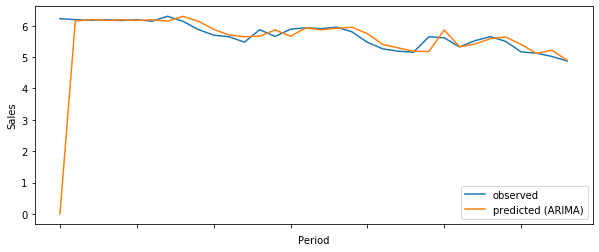

In [37]:
plt.figure(figsize=(10,4))
plot1=train.plot(label='observed')
pred_arima_train.predicted_mean.plot(ax=plot1,label='predicted (ARIMA)')

plt.xlabel('Period')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

Lets check the stationarity of the residual series

### Stationarity tests

In [38]:
residual = pred_arima_train.predicted_mean- train

In [39]:
residual1= residual [~residual.isnull()]

adf_test= ts.adfuller(residual1,autolag='AIC')

print('ADF Statistic: %f' % adf_test[0])
print('P-value : %f'% adf_test[1])
print('Critical Values : ')

for key, values in adf_test[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -37.845337
P-value : 0.000000
Critical Values : 
	1%: -3.646
	5%: -2.954
	10%: -2.616


Test statistc is less than Critical values so we can conclude that residual series is stationary or pure white noice.
p-value obtained by the ADF test is less than 0.05 so the residual series is pure white noice.

In [40]:
kpss_test= ts.kpss(residual1,regression='c', store=False)

print('KPSS Statistic: %f' % kpss_test[0])
print('P-value : %f'% kpss_test[1])
print('Critical Values : ')

for key, values in kpss_test[3].items():
    print('\t%s: %.3f' % (key, values))

KPSS Statistic: 0.340311
P-value : 0.100000
Critical Values : 
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


Test statistc is less than Critical values so we can conclude that residual series is stationary or pure white noice.
p-value obtained by the ADF test is less than 0.05 so the residual series is pure white noice.

In [41]:
arima_pred_train= np.exp(pred_arima_train.predicted_mean)
n= len(arima_pred_train)
total=0
for i in range(n):
    total=total+np.absolute((100*(np.exp(train.iloc[i]) - arima_pred_train.iloc[i])/np.exp(train.iloc[i])))
    
MAPE=total/n
print("MAPE Value :  {}".format(round(MAPE,4)))

MAPE Value :  15.3138


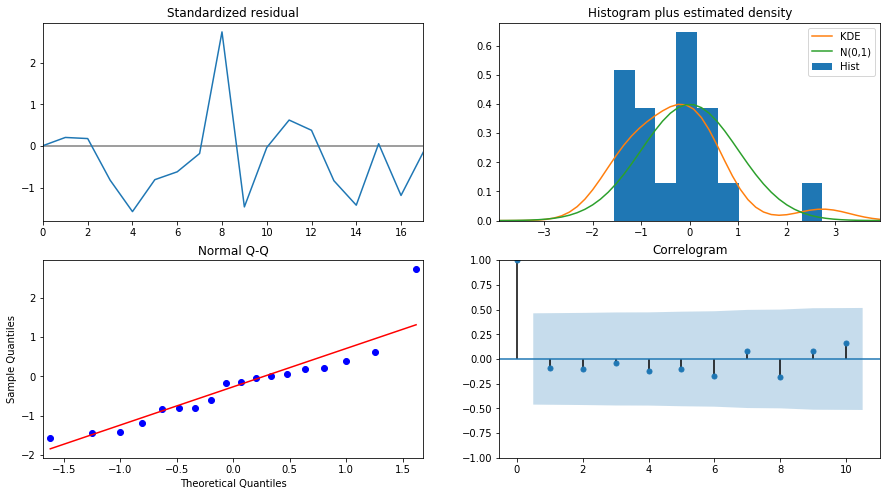

In [42]:
results_arima_train.plot_diagnostics(figsize=(15,8))
plt.show()

In [43]:
pred_arima = results_arima_train.forecast(steps=5)
test=pd.read_csv('TestData - Test.csv', index_col=0) 

In [44]:
test_a=test['EQ']
test_a1=test_a.reset_index().drop('Period',1)
pred_arima1=np.exp(pred_arima.reset_index().drop('index',1))

<Figure size 1008x432 with 0 Axes>

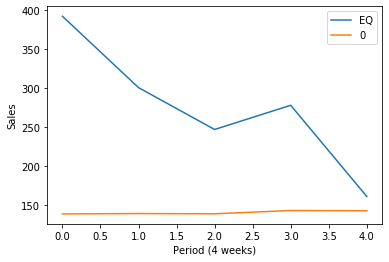

In [45]:
plt.figure(figsize=(14,6))
plot1=test_a1.plot(label='observed')
pred_arima1.plot(ax=plot1,label='predicted (ARIMA)')

plt.xlabel('Period (4 weeks)')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [46]:
arima_pred_test= pred_arima1[0]
n= len(arima_pred_test)
total=0
for i in range(n):
    total=total+np.absolute((100*(test_a1.iloc[i] - arima_pred_test.iloc[i])/test_a1.iloc[i]))
    
MAPE=total/n
print("MAPE Value :  {}".format(round(MAPE,4)))

MAPE Value :  EQ    44.3012
dtype: float64


In [47]:
print(test_a1.iloc[4] - arima_pred_test.iloc[4])

EQ    18.2806
Name: 4, dtype: float64


In [48]:
# Saving the model :
from sklearn.externals import joblib

# Save the model as a pickle in a file 
joblib.dump(results_arima_train, 'Time_Series_Model_Small_Data.pkl')


['Time_Series_Model_Small_Data.pkl']